# Dataloader File

This file's purpose is to get, prepare, explore, transform and load the images from the dataset.

In [10]:
import torch 
from torch import nn

torch.__version__

'2.2.2'

In [11]:
import torchvision

torchvision.__version__

'0.17.2'

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Data Setup

Since we are using kaggle to access this dataset, here is the documentation to setup the kaggle API to make it easier:
https://www.kaggle.com/settings

Additionally, here is the link to the dataset website: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

### Getting Data

In [14]:
import os
import zipfile
from pathlib import Path
import subprocess

# Define the dataset and paths
dataset = 'puneet6060/intel-image-classification'

# Navigate one level up to place the data folder at the same level as the src folder
base_path = Path("..")  # Represents one level above the current directory
data_path = base_path / 'data'
zip_path = data_path / 'intel-image-classification.zip'

# Create data directory if it doesn't exist
data_path.mkdir(parents=True, exist_ok=True)

# Download the zip file if it doesn't already exist
if not zip_path.exists():
    print(f"Downloading {dataset} dataset...")
    subprocess.run(['kaggle', 'datasets', 'download', '-d', dataset, '-p', str(data_path)])
else:
    print(f"{zip_path} already exists. Skipping download.")

# Extract the dataset directly into the data folder
if not any(data_path.iterdir()):  # Check if data folder is empty
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_path)
else:
    print(f"{data_path} already exists and is not empty. Skipping extraction.")


../data/intel-image-classification.zip already exists. Skipping download.
../data already exists and is not empty. Skipping extraction.


In [15]:
image_path = data_path / "intel-image-classification"
image_path

PosixPath('../data/intel-image-classification')

In [16]:
from helper_functions import walk_through_dir
walk_through_dir(image_path)

There are 3 directories and 0 images in '../data/intel-image-classification'.
There are 1 directories and 0 images in '../data/intel-image-classification/seg_test'.
There are 6 directories and 0 images in '../data/intel-image-classification/seg_test/seg_test'.
There are 0 directories and 474 images in '../data/intel-image-classification/seg_test/seg_test/forest'.
There are 0 directories and 437 images in '../data/intel-image-classification/seg_test/seg_test/buildings'.
There are 0 directories and 553 images in '../data/intel-image-classification/seg_test/seg_test/glacier'.
There are 0 directories and 501 images in '../data/intel-image-classification/seg_test/seg_test/street'.
There are 0 directories and 525 images in '../data/intel-image-classification/seg_test/seg_test/mountain'.
There are 0 directories and 510 images in '../data/intel-image-classification/seg_test/seg_test/sea'.
There are 1 directories and 0 images in '../data/intel-image-classification/seg_train'.
There are 6 direct

In [17]:
train_dir = image_path / "seg_test"
test_dir = image_path / "seg_test"
pred_dir = image_path / "seg_pred"

train_dir, test_dir, pred_dir

(PosixPath('../data/intel-image-classification/seg_test'),
 PosixPath('../data/intel-image-classification/seg_test'),
 PosixPath('../data/intel-image-classification/seg_pred'))

### Visualizing an Image

../data/intel-image-classification/seg_train/seg_train/forest/19011.jpg
forest
Random image path: ../data/intel-image-classification/seg_train/seg_train/forest/19011.jpg
Image class: forest
Image height: 150
Image width: 150


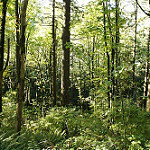

In [77]:
import random
from PIL import Image

random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

image_path_list = list(image_path.glob("*/*/*/*.jpg")) # This line gets all the images by constantly traversing every single item in the given directory and the following ones as well
# print(image_path_list)
# print(f"The Found List Length is {len(image_path_list)}\n")

# Picking a random image
random_image_path = random.choice(image_path_list)
print(random_image_path)

# The image class is the name of the directory where the image is stored
image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)

# Metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

